# Exercice

The idea is to reproduce as well as you can this graph. Data has been prepared and is available in the file _"exports_and_imports_to_and_from_DENMARK_&_NORWAY_from_1700_to_1780.csv"_

<img src="./images/Playfair_TimeSeries.png" width="800px">

In [2]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.textpath as mpath

In [3]:
time_serie = pd.read_csv('./data/exports_and_imports_to_and_from_DENMARK_&_NORWAY_from_1700_to_1780.csv')
time_serie['Balance'] = time_serie['Exports'] - time_serie['Imports']
time_serie.head()

,Date,Imports,Exports,Balance
0,1700,70.0,34.3,-35.7
1,1701,71.5,36.4,-35.1
2,1702,72.4,38.5,-33.9
3,1703,73.1,40.1,-33.0
4,1704,73.6,41.4,-32.2


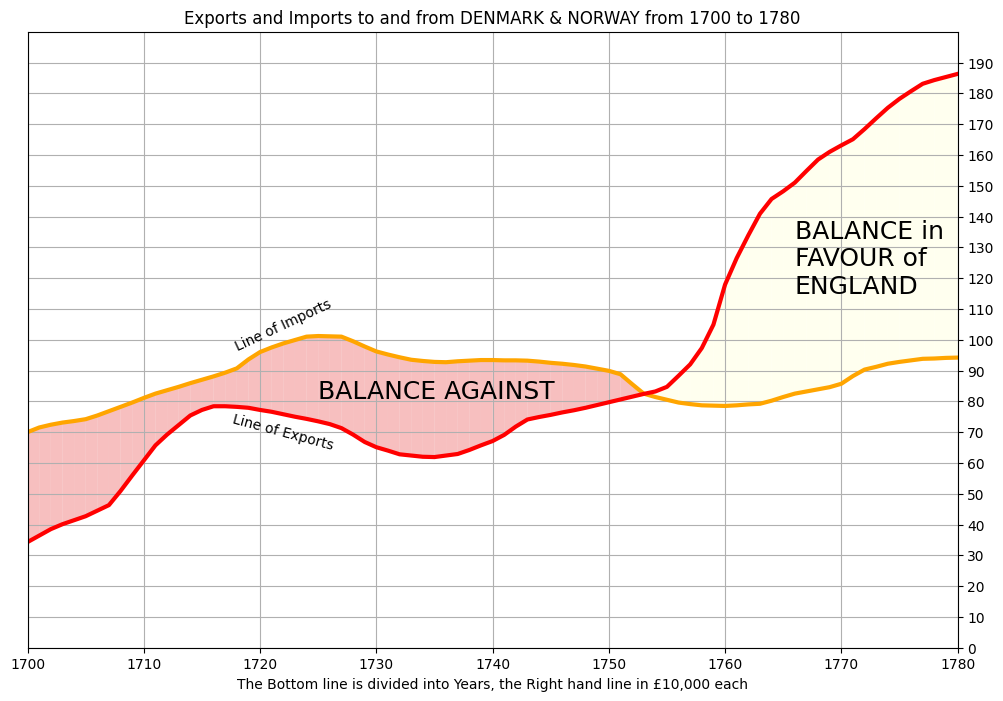

In [5]:
import matplotlib.pyplot as plt
import numpy as np

f=plt.figure(figsize=(12, 8))
ax = f.add_subplot(111)

# Trace pour les Imports
plt.plot(time_serie['Date'], 
         time_serie['Imports'], 
         color='orange', 
         linewidth=3, 
         label='Line of Imports')

# Remplissage des zones positives et négatives
for i in range(1, len(time_serie)):
    x = [time_serie['Date'][i - 1], time_serie['Date'][i]]
    y1 = [time_serie['Exports'][i - 1], time_serie['Exports'][i]]
    y2 = [time_serie['Imports'][i - 1], time_serie['Imports'][i]]

    if time_serie['Balance'][i] >= 0:
        plt.fill_between(x, 
                         y1, 
                         y2, 
                         color='lightyellow', 
                         alpha=0.5, 
                          edgecolor='none'
                         )  # Vert clair pour les différences positives
    else:
        plt.fill_between(x, y1, y2, color='lightcoral', alpha=0.5, edgecolor='none')  # Rouge clair pour les différences négatives

# Trace pour les Exports (par-dessus les zones remplies)
plt.plot(time_serie['Date'], time_serie['Exports'], color='red', linewidth=3, label='Line of Exports')

# Ajout du titre et des étiquettes des axes
plt.title('Exports and Imports to and from DENMARK & NORWAY from 1700 to 1780')
plt.xlabel('The Bottom line is divided into Years, the Right hand line in £10,000 each')

# Ajout des annotations avec étiquettes aux positions x spécifiées
import_annotation_x = 1722
import_annotation_y = time_serie['Imports'][time_serie['Date'] == import_annotation_x].iloc[0]
plt.annotate('Line of Imports', 
             (import_annotation_x, 
              import_annotation_y), 
              textcoords="offset points", 
              xytext=(0,-5), 
              ha='center', 
              rotation=25)

export_annotation_x = 1722
export_annotation_y = time_serie['Exports'][time_serie['Date'] == export_annotation_x].iloc[0]
plt.annotate('Line of Exports', 
             (export_annotation_x, 
              export_annotation_y), 
              textcoords="offset points", 
              xytext=(0,-25), 
              ha='center', 
              rotation=-15)

plt.xlim([1700,1780])
plt.ylim([0,200])

# Set the y ticks to be multiples of 20
plt.yticks(range(0, 
                 int(max(time_serie['Imports'].max(), 
                         time_serie['Exports'].max())) + 10, 10))
ax.yaxis.tick_right()

# Add text "Balance Against" at coordinates x=1730, y=80
ax.text(1725, 81, 'BALANCE AGAINST', fontsize=18)
# Add text "Balance Against" at coordinates x=1730, y=80
ax.text(1766, 115, 'BALANCE in\nFAVOUR of\nENGLAND', fontsize=18)

plt.grid()
plt.show()